# Exercises
#### Our Zillow scenario continues:

#### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

- In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

- As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

- Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [3]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import wrangle as w

import warnings
warnings.filterwarnings('ignore')

In [4]:
train, validate, test = w.wrangle_zillow()

In [5]:
train.shape, validate.shape, test.shape

((1198531, 7), (513657, 7), (428047, 7))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 1320455 to 366825
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bed_count    1198531 non-null  float64
 1   bath_count   1198531 non-null  float64
 2   sqr_ft       1198531 non-null  float64
 3   tax_val_usd  1198531 non-null  float64
 4   yearbuilt    1198531 non-null  object 
 5   taxamount    1198531 non-null  float64
 6   fips         1198531 non-null  object 
dtypes: float64(5), object(2)
memory usage: 73.2+ MB


In [48]:
train_sample = train.sample(10000)

In [20]:
train_sample.isnull().sum()

bed_count      0
bath_count     0
sqr_ft         0
tax_val_usd    0
yearbuilt      0
taxamount      0
fips           0
dtype: int64

#### Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [26]:
def plot_variable_pairs(df):
    
    # select only numeric columns
    df = df.select_dtypes(include=[np.number])

    # plot pairwise relationships with regression line
    sns.pairplot(df, kind='reg', corner=True)
    plt.show()

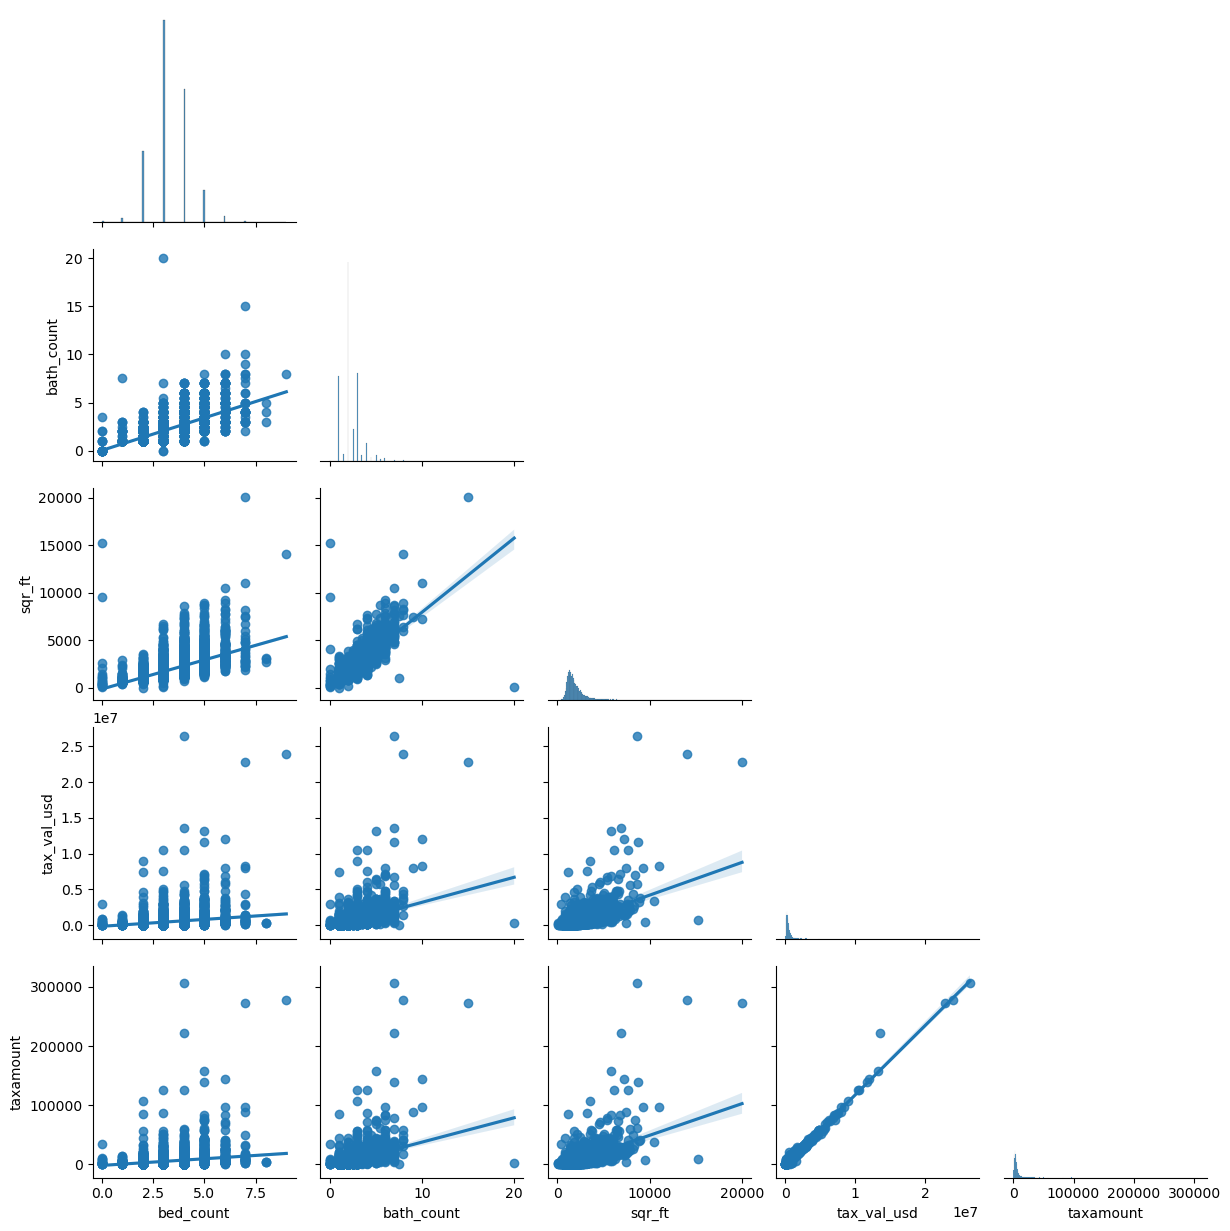

In [27]:
plot_variable_pairs(train_sample)

#### Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [136]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    # Boxplot
    sns.boxplot(x=categorical_var, y=continuous_var, data=df)
    plt.title(f"{categorical_var} vs {continuous_var}")

    # jointplot
    sns.jointplot(x=categorical_var, y=continuous_var, data=df, kind='reg')
    plt.title(f"{continuous_var} vs {categorical_var}")

    # lmplot
    sns.lmplot(x=categorical_var, y=continuous_var, data=df, line_kws={'color': 'red'})
    plt.title(f"{continuous_var} vs {categorical_var}")
    
    plt.show()

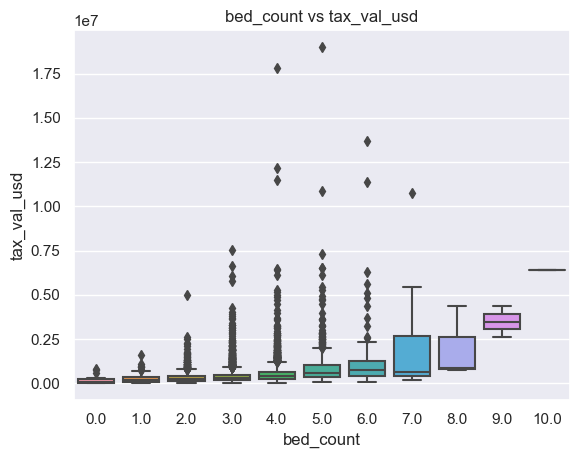

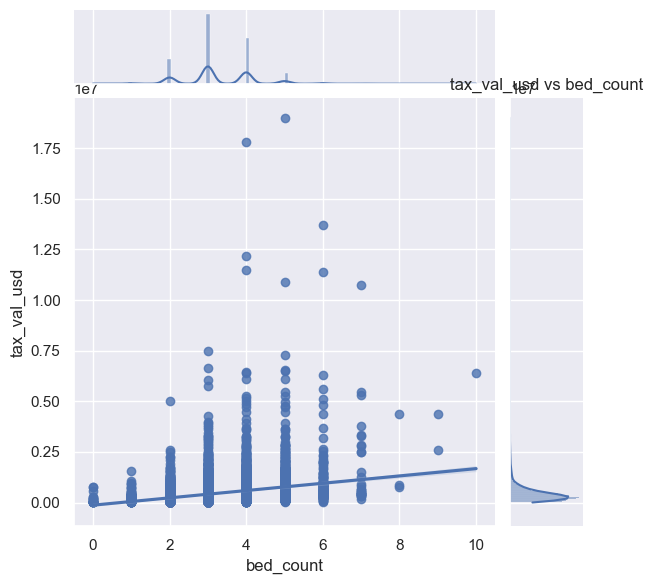

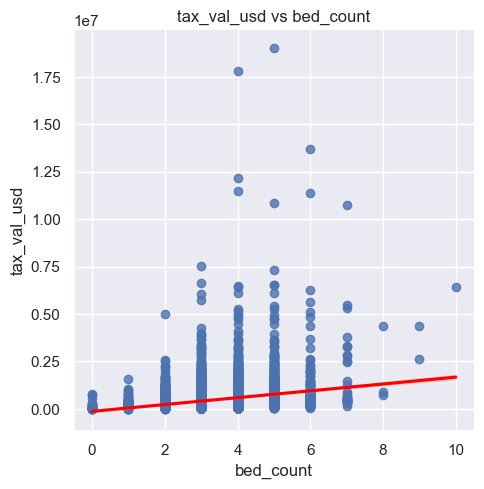

In [138]:
plot_categorical_and_continuous_vars(train_sample, "bed_count", "tax_val_usd")

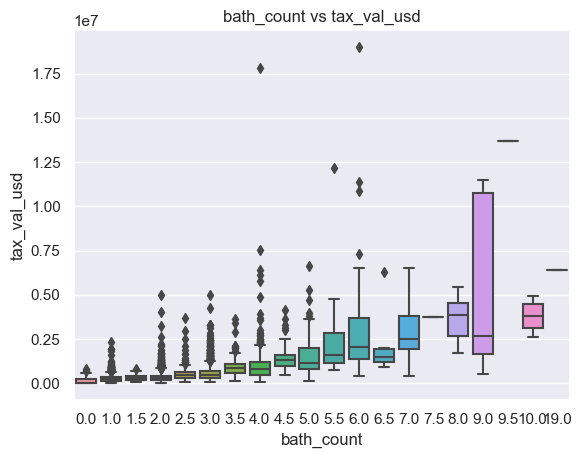

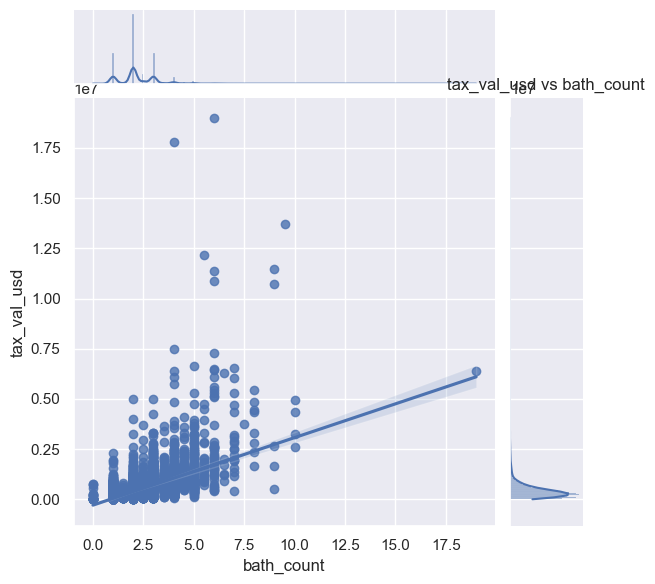

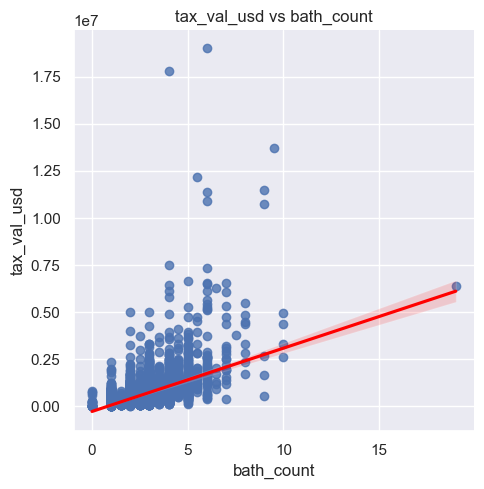

In [139]:
plot_categorical_and_continuous_vars(train_sample, "bath_count", "tax_val_usd")

#### Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

#### Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

#### Come up with some initial hypotheses based on your goal of predicting property value.

#### Visualize all combinations of variables in some way.

#### Run the appropriate statistical tests where needed.

#### What independent variables are correlated with the dependent variable, home value?

#### Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

#### Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

#### Explore your dataset with any other visualizations you think will be helpful.

In [41]:
train_sample.select_dtypes(include=[np.number])

,bed_count,bath_count,sqr_ft,tax_val_usd,taxamount
249429,3.0,2.0,1200.0,443800.0,5474.60
1879971,4.0,3.0,2366.0,683385.0,7931.33
646248,3.0,1.5,1120.0,340108.0,3929.52
957497,5.0,4.0,4374.0,1765410.0,18929.18
1780883,3.0,2.0,1797.0,1100900.0,13958.25
...,...,...,...,...,...
161634,4.0,4.0,2127.0,242423.0,3335.77
742651,3.0,3.0,3096.0,310659.0,4769.77
1010265,4.0,2.0,1718.0,87757.0,1221.14
573337,3.0,2.0,1632.0,109441.0,1691.99
